In [ ]:
from google.colab import files
uploaded = files.upload()   # choose the zombie dataset CSV


Saving zombies_data - Sheet1.csv to zombies_data - Sheet1.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Load CSV
# -----------------------------
data = pd.read_csv("zday.csv")   # <-- your uploaded file name

X = data[['SprintSpeed', 'AmmoClips']].values
y = data['Result'].values.reshape(-1, 1)

# -----------------------------
# Normalization (crucial)
# -----------------------------
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add bias term
m = X_norm.shape[0]
X_bias = np.hstack((np.ones((m, 1)), X_norm))   # (m × 3)

# -----------------------------
# Sigmoid Function
# -----------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -----------------------------
# Cost Function
# -----------------------------
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

# -----------------------------
# Gradient Descent
# -----------------------------
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= lr * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# -----------------------------
# Training
# -----------------------------
theta = np.zeros((3,1))
lr = 0.1
iterations = 3000

theta, cost_history = gradient_descent(X_bias, y, theta, lr, iterations)

print("Final parameters:\n", theta)


Final parameters:
 [[1.44914079]
 [6.78386509]
 [4.90830166]]


In [ ]:
runner = np.array([[25, 1]])
runner_norm = (runner - X_mean) / X_std
runner_bias = np.hstack((np.ones((1,1)), runner_norm))

prob = sigmoid(runner_bias @ theta)[0][0]

print("Survival Probability:", prob)
print("Prediction:", "Survives (1)" if prob >= 0.5 else "Infected (0)")


Survival Probability: 0.9998258431853287
Prediction: Survives (1)


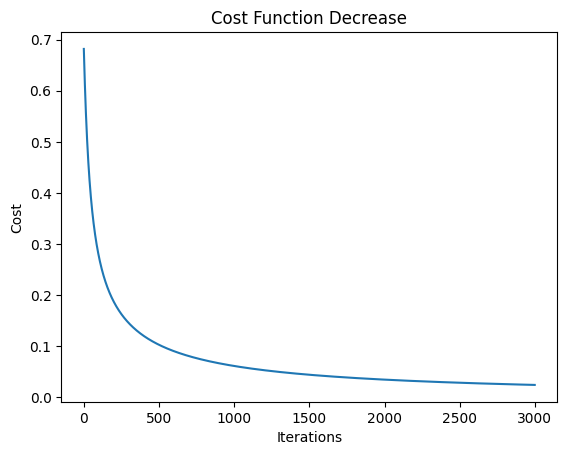

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Decrease")
plt.show()


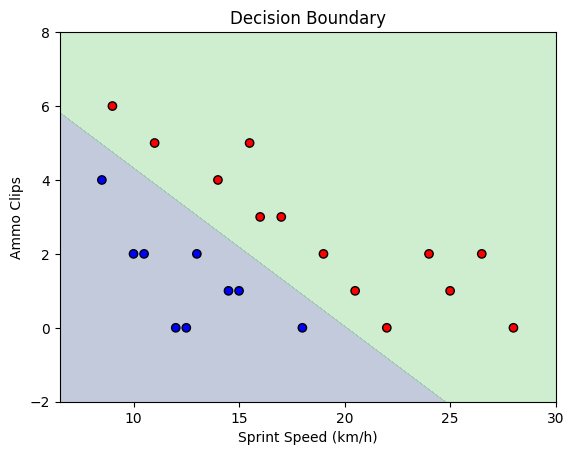

In [ ]:
# Create a grid for plotting
x_vals = np.linspace(X[:,0].min()-2, X[:,0].max()+2, 100)
y_vals = np.linspace(X[:,1].min()-2, X[:,1].max()+2, 100)

xx, yy = np.meshgrid(x_vals, y_vals)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_norm = (grid - X_mean) / X_std
grid_bias = np.hstack((np.ones((grid_norm.shape[0],1)), grid_norm))

zz = sigmoid(grid_bias @ theta)
zz = zz.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='bwr', edgecolors='k')
plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary")
plt.show()
